In [1]:
import requests
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt

## Json

In [53]:
import requests

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=COFFEE&interval=monthly&apikey=26B3CDZ7KYBASZXV'
r = requests.get(url)
data = r.json()

#print(data)

In [102]:
data_coffe = data["data"]
data_coffe

[{'date': '2023-09-01', 'value': '183.589047619048'},
 {'date': '2023-08-01', 'value': '186.346956521739'},
 {'date': '2023-07-01', 'value': '193.494285714286'},
 {'date': '2023-06-01', 'value': '207.385'},
 {'date': '2023-05-01', 'value': '220.121304347826'},
 {'date': '2023-04-01', 'value': '229.9555'},
 {'date': '2023-03-01', 'value': '222.663913043478'},
 {'date': '2023-02-01', 'value': '229.506'},
 {'date': '2023-01-01', 'value': '206.76'},
 {'date': '2022-12-01', 'value': '210.388636363636'},
 {'date': '2022-11-01', 'value': '213.718181818182'},
 {'date': '2022-10-01', 'value': '240.082380952381'},
 {'date': '2022-09-01', 'value': '267.492272727273'},
 {'date': '2022-08-01', 'value': '268.48347826087'},
 {'date': '2022-07-01', 'value': '255.906666666667'},
 {'date': '2022-06-01', 'value': '273.763636363636'},
 {'date': '2022-05-01', 'value': '260.449545454545'},
 {'date': '2022-04-01', 'value': '265.397619047619'},
 {'date': '2022-03-01', 'value': '258.99347826087'},
 {'date': '2

In [128]:
df = pd.DataFrame(data_coffe)
df1 = df.set_index(df['date'])
df2 = df1.drop('date',axis =1)
df2 = df2[df2['value'] != '.']
df2.tail()


,value
date,
1990-05-01,92.0199890136719
1990-04-01,93.7300109863281
1990-03-01,93.9599914550781
1990-02-01,84.010009765625
1990-01-01,75.8299865722656


In [153]:
df2['value'] = df2['value'].astype(float)

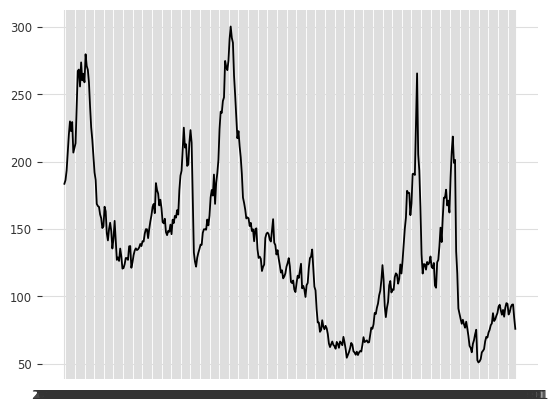

In [154]:
plt.plot(df2['value'])

## Csv

In [2]:
dataaa = pd.read_csv('coffee.csv',index_col='Date')
dataaa = dataaa.drop('Currency',axis =1)

dataaa.head(20)

,Open,High,Low,Close,Volume
Date,,,,,
2000-01-03,122.25,124.00,116.10,116.50,6640
2000-01-04,116.25,120.50,115.75,116.25,5492
2000-01-05,115.00,121.00,115.00,118.60,6165
2000-01-06,119.00,121.40,116.50,116.85,5094
2000-01-07,117.25,117.75,113.80,114.15,6855
2000-01-10,123.50,126.00,116.70,117.55,7499
2000-01-11,115.50,118.25,115.50,117.80,3976
2000-01-12,117.80,120.50,116.90,118.95,5184
2000-01-13,119.25,120.00,117.50,118.55,3717


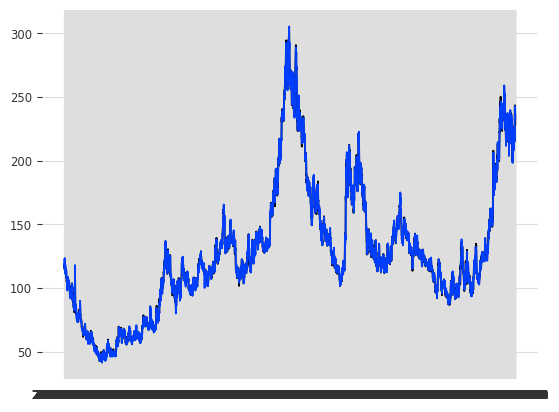

In [161]:
plt.plot(dataaa['Close'])
plt.plot(dataaa['Open'])

In [182]:
from darts import TimeSeries

series = TimeSeries.from_dataframe(dataaa,time_col=None,"Close")

SyntaxError: positional argument follows keyword argument (446858528.py, line 3)

In [3]:
from hmmlearn import hmm
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(dataaa)

# Create and train Gaussian HMM
# n_components is the number of hidden states
model = hmm.GaussianHMM(n_components=3, covariance_type='diag', n_iter=1000)
model.fit(data_scaled)

# Predict the optimal sequence of internal hidden states
hidden_states = model.predict(data_scaled)

# Get the transition matrix
transmat = model.transmat_

# Get the means and covariance of the components
means = model.means_
covars = model.covars_

# Print the results
print('Transition Matrix:', transmat)
print('Means:', means)
print('Covars:', covars)
print('Predicted Hidden States:', hidden_states)

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Transition Matrix: [[9.98158361e-01 1.84163928e-03 1.31741666e-86]
 [6.09517770e-04 9.96945849e-01 2.44463346e-03]
 [2.00294419e-87 5.09780618e-03 9.94902194e-01]]
Means: [[-1.28573743 -1.28209301 -1.28746173 -1.28358961 -0.42582765]
 [-0.17226814 -0.17488    -0.1711007  -0.17336506  0.10764221]
 [ 1.42309329  1.42643958  1.42167268  1.42401233  0.07925244]]
Covars: [[[0.04525944 0.         0.         0.         0.        ]
  [0.         0.04557985 0.         0.         0.        ]
  [0.         0.         0.04524292 0.         0.        ]
  [0.         0.         0.         0.04552067 0.        ]
  [0.         0.         0.         0.         0.24356837]]

 [[0.08307561 0.         0.         0.         0.        ]
  [0.         0.0816854  0.         0.         0.        ]
  [0.         0.         0.0825909  0.         0.        ]
  [0.         0.         0.         0.08300279 0.        ]
  [0.         0.         0.         0.         1.19541681]]

 [[0.53672253 0.         0.         0

In [5]:
data = dataaa
# Initialize an empty list to store signals
signals = []

# Loop through hidden_states to generate signals
for i in range(1, len(hidden_states)):
    # Buy Signal: Transition from state 0 (bearish) to state 1 (bullish)
    if hidden_states[i] == 1 and hidden_states[i-1] == 0:
        signals.append('Buy')
    # Sell Signal: Transition from state 1 (bullish) to state 0 (bearish)
    elif hidden_states[i] == 0 and hidden_states[i-1] == 1:
        signals.append('Sell')
    # Hold: No transition
    else:
        signals.append('Hold')

# Add signals to your DataFrame
data['Signal'] = ['Hold'] + signals  # Assuming 'data' is your DataFrame containing price and volume

In [6]:
data

,Open,High,Low,Close,Volume,Signal
Date,,,,,,
2000-01-03,122.25,124.00,116.10,116.50,6640,Hold
2000-01-04,116.25,120.50,115.75,116.25,5492,Hold
2000-01-05,115.00,121.00,115.00,118.60,6165,Hold
2000-01-06,119.00,121.40,116.50,116.85,5094,Hold
2000-01-07,117.25,117.75,113.80,114.15,6855,Hold
...,...,...,...,...,...,...
2022-08-29,240.55,240.55,240.55,240.50,1,Hold
2022-08-30,238.75,241.75,238.75,239.15,14,Hold
2022-08-31,240.75,240.75,239.65,239.10,12,Hold


In [10]:
import numpy as np
import pandas as pd
from hmmlearn import hmm
from sklearn.preprocessing import StandardScaler

# Simulated data: Replace this with your actual coffee price and volume data
#price = np.random.rand(100)
#volume = np.random.rand(100)
data = pd.DataFrame({'Price': dataaa["Close"], 'Volume': dataaa["Volume"]})

# Data Preprocessing: Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Create and train Gaussian HMM
model = hmm.GaussianHMM(n_components=6, covariance_type='diag', n_iter=1000)
model.fit(data_scaled)

# Predict the optimal sequence of internal hidden states
hidden_states = model.predict(data_scaled)

# Initialize an empty list to store signals
signals = ['Hold']  # Initialize with 'Hold' for the first data point

# Loop through hidden_states to generate signals
for i in range(1, len(hidden_states)):
    if hidden_states[i] == 1 and hidden_states[i-1] == 0:
        signals.append('Buy')
    elif hidden_states[i] == 0 and hidden_states[i-1] == 1:
        signals.append('Sell')
    else:
        signals.append('Hold')

# Add signals to your DataFrame
data['Signal'] = signals

# Print the signals
print('Generated Signals:', data['Signal'].values)

Model is not converging.  Current: -573.906634306097 is not greater than -573.8708149561966. Delta is -0.03581934990040736


Generated Signals: ['Hold' 'Hold' 'Hold' ... 'Hold' 'Hold' 'Hold']


(array([5.742e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 4.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

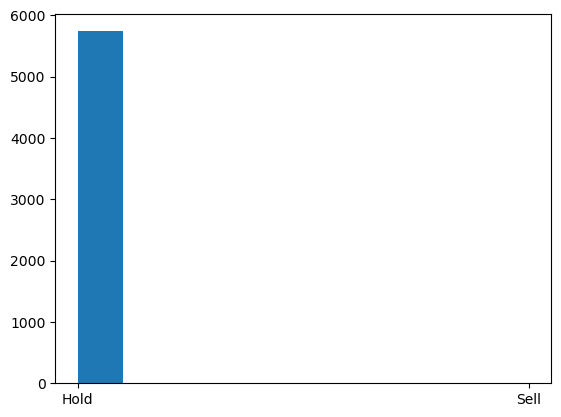

In [11]:
plt.hist(data["Signal"])